In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = 'YOUR_API_KEY'

In [3]:
from PIL import Image
from IPython.core.display import HTML
from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.action import PROMPT

c:\Users\mehal\anaconda3\envs\visprog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
interpreter = ProgramInterpreter(dataset='storygen')

Registering RESULT step
Registering STORYIMG step


In [5]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

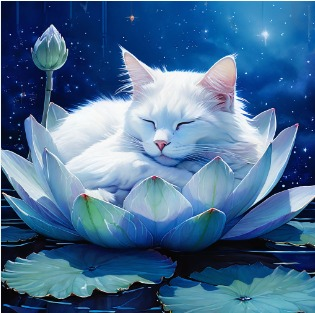

In [6]:
image = Image.open('../assets/catonleaf.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB'),
)
image

In [7]:
source_prompt = "a white cat sleeping on a floating leaf"
target_prompt = "a dreamy bear sleeping on a floating leaf"
img_path = '../assets/catonleaf.png'
instruction = f"Visualize this story: {source_prompt}. {target_prompt}."
prog = generator.generate(instruction)
print(prog)

IMAGE0=STORYIMG(image=IMAGE, src_prompt='a white cat sleeping on a floating leaf', target_prompt='a dreamy bear sleeping on a floating leaf', seed = 200, w1 = 1.5)
FINAL_RESULT=RESULT(var=[IMAGE0])


STORYIMG
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x1BB7F3DDCC0>

RESULT

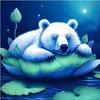

KeyError: '['

In [8]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

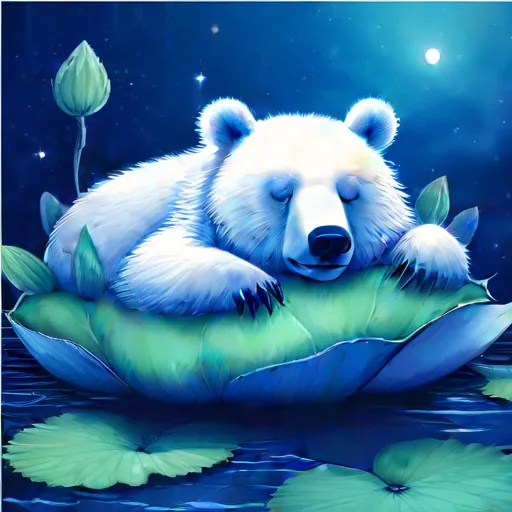

In [ ]:
result


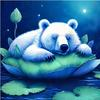
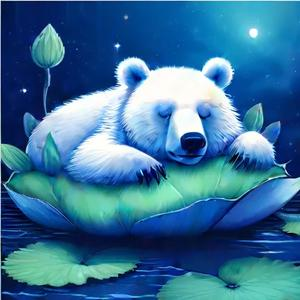

In [ ]:
HTML(html_str)

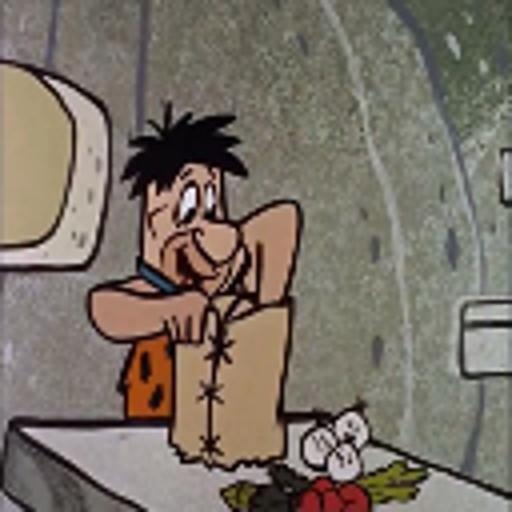

In [ ]:
image = Image.open('../assets/test_img1.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB'),
)
image

In [ ]:
# story = "Fred is standing by the kitchen counter, unpacking groceries from a bag, with an apple partially visible at the top. He reaches into the grocery bag and takes out an apple, holding it in his hand. He places the apple on the kitchen table near the center, while the grocery bag remains on the counter. Fred picks up a knife from the table to grasp its handle, leaning slightly forward. He slices the apple into small, even pieces with the knife, as a few slices scatter on the table."
# story = "Fred is standing in a cozy, well-lit kitchen with warm wooden cabinets, unpacking groceries from a slightly crumpled paper bag placed on the counter, with visible items such as apples, bread, and canned goods partially spilling out. As Fred continues unpacking, his hand accidentally breaks through the side of the grocery bag, tearing the paper, causing a few items to drop onto the counter and floor, while he looks surprised and slightly frustrated. Fred suddenly turns his head towards the kitchen window, drawn by an intriguing smell wafting in, with his expression shifting to one of curiosity and his body slightly angled towards the source.  Fred is engaged in an animated conversation with Barney through the window, gesturing lightly with one hand while smiling, as Barney, visible outside, responds enthusiastically with a friendly expression."
story = "Fred reached into the grocery bag, his hand breaking through the thin paper as he grabbed a loaf of bread from the bottom. Fred froze, turning toward the window as the scent of sizzling bacon and smoky wood smoke filled the kitchen air. Fred looked outside, spotting Barney leaning casually on the wooden fence, waving with a grin while flipping a spatula. Fred took a step closer to the window, trying to hear Barney’s voice over the gentle rustle of leaves and distant birds chirping. Fred raised his hand in greeting as Barney spoke, the two of them sharing a moment of casual banter under the golden afternoon sun."
instruction = f"Visualize this story: {story}."
prog = generator.generate(instruction)
print(prog)

IMAGE0=STORYIMG(image=IMAGE, src_prompt='Fred reached into the grocery bag, his hand breaking through the thin paper as he grabbed a loaf of bread from the bottom.', target_prompt='Fred froze, turning toward the window as the scent of sizzling bacon and smoky wood smoke filled the kitchen air.', seed = 200, w1 = 1.5)
IMAGE1 = STORYIMG(image=IMAGE0, src_prompt='Fred froze, turning toward the window as the scent of sizzling bacon and smoky wood smoke filled the kitchen air.', target_prompt='Fred looked outside, spotting Barney leaning casually on the wooden fence, waving with a grin while flipping a spatula.', seed = 200, w1 = 1.5)
IMAGE2 = STORYIMG(image=IMAGE1, src_prompt='Fred looked outside, spotting Barney leaning casually on the wooden fence, waving with a grin while flipping a spatula.', target_prompt='Fred took a step closer to the window, trying to hear Barney’s voice over the gentle rustle of leaves and distant birds chirping.', seed = 200, w1 = 1.5)
IMAGE3 = STORYIMG(image=IMA

STORYIMG
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x23CD227C400>

STORYIMG
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x23CD2265E70>

STORYIMG
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x23CD227FEB0>

STORYIMG
Loaded as API: https://turboedit-turbo-edit.hf.space ✔
<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x23CD2265390>

RESULT

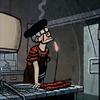
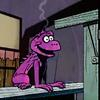
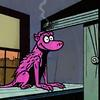
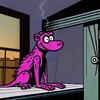

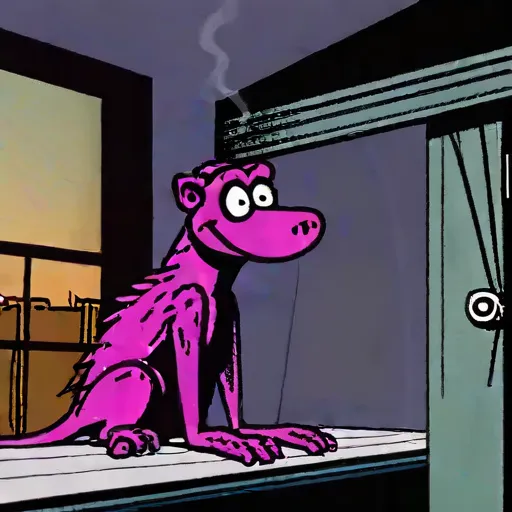

In [ ]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
result


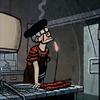
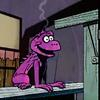
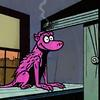
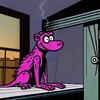
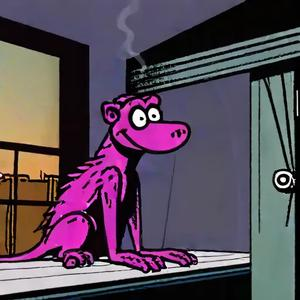

In [ ]:
HTML(html_str)